In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import collections
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support, accuracy_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.objectives import binary_crossentropy
from keras.callbacks import LearningRateScheduler
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
from keras.callbacks import Callback
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

In [42]:
df = pd.read_csv('Inputs/CUSTOMER_CHURN_TELCO/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [43]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Convert TotalCharges to numeric. 

In [45]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are many categorical features in the data set. Lets visualize them first then create dummy variables.

In [47]:
print([key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object'] ])

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


### Visualize and Analyze Categorical Features

### Gender

In [48]:
gender_plot = df.groupby(['gender', 'Churn']).size().reset_index().pivot(columns='Churn', index='gender', values=0)
#gender_plot.plot(x=gender_plot.index, kind='bar', stacked=True);
print('Gender', collections.Counter(df['gender']))

Gender Counter({'Male': 3555, 'Female': 3488})


### Partner

In [49]:
partner_plot = df.groupby(['Partner', 'Churn']).size().reset_index().pivot(columns='Churn', index='Partner', values=0)
#partner_plot.plot(x=partner_plot.index, kind='bar', stacked=True);
print('Partner', collections.Counter(df['Partner']))

Partner Counter({'No': 3641, 'Yes': 3402})


### Dependents

In [50]:
dependents_plot = df.groupby(['Dependents', 'Churn']).size().reset_index().pivot(columns='Churn', index='Dependents', values=0)
#dependents_plot.plot(x=dependents_plot.index, kind='bar', stacked=True);
print('Dependents', collections.Counter(df['Dependents']))

Dependents Counter({'No': 4933, 'Yes': 2110})


Customers that have no dependents are more likely to churn than customers that have dependents. Interesting.

### PhoneService

In [51]:
phoneservice_plot = df.groupby(['PhoneService', 'Churn']).size().reset_index().pivot(columns='Churn', index='PhoneService', values=0)
#phoneservice_plot.plot(x=phoneservice_plot.index, kind='bar', stacked=True);
print('PhoneService', collections.Counter(df['PhoneService']))

PhoneService Counter({'Yes': 6361, 'No': 682})


### MultipleLines

In [52]:
multiplelines_plot = df.groupby(['MultipleLines', 'Churn']).size().reset_index().pivot(columns='Churn', index='MultipleLines', values=0)
#multiplelines_plot.plot(x=multiplelines_plot.index, kind='bar', stacked=True);
print('MultipleLines', collections.Counter(df['MultipleLines']))

MultipleLines Counter({'No': 3390, 'Yes': 2971, 'No phone service': 682})


### InternetService

In [54]:
internetservice_plot = df.groupby(['InternetService', 'Churn']).size().reset_index().pivot(columns='Churn', index='InternetService', values=0)
#internetservice_plot.plot(x=internetservice_plot.index, kind='bar', stacked=True);
print('InternetService', collections.Counter(df['InternetService']))

InternetService Counter({'Fiber optic': 3096, 'DSL': 2421, 'No': 1526})


### OnlineSecurity

In [55]:
onlinesecurity_plot = df.groupby(['OnlineSecurity', 'Churn']).size().reset_index().pivot(columns='Churn', index='OnlineSecurity', values=0)
#onlinesecurity_plot.plot(x=onlinesecurity_plot.index, kind='bar', stacked=True);
print('OnlineSecurity', collections.Counter(df['OnlineSecurity']))

OnlineSecurity Counter({'No': 3498, 'Yes': 2019, 'No internet service': 1526})


### OnlineBackup

In [56]:
onlinebackup_plot = df.groupby(['OnlineBackup', 'Churn']).size().reset_index().pivot(columns='Churn', index='OnlineBackup', values=0)
#onlinebackup_plot.plot(x=onlinebackup_plot.index, kind='bar', stacked=True);
print('OnlineBackup', collections.Counter(df['OnlineBackup']))

OnlineBackup Counter({'No': 3088, 'Yes': 2429, 'No internet service': 1526})


### DeviceProtection

In [57]:
deviceprotection_plot = df.groupby(['DeviceProtection', 'Churn']).size().reset_index().pivot(columns='Churn', index='DeviceProtection', values=0)
#deviceprotection_plot.plot(x=deviceprotection_plot.index, kind='bar', stacked=True);
print('DeviceProtection', collections.Counter(df['DeviceProtection']))

DeviceProtection Counter({'No': 3095, 'Yes': 2422, 'No internet service': 1526})


### TechSupport

In [58]:
techsupport_plot = df.groupby(['TechSupport', 'Churn']).size().reset_index().pivot(columns='Churn', index='TechSupport', values=0)
#techsupport_plot.plot(x=techsupport_plot.index, kind='bar', stacked=True);
print('TechSupport', collections.Counter(df['TechSupport']))

TechSupport Counter({'No': 3473, 'Yes': 2044, 'No internet service': 1526})


TechSupport seems to be an important factor for churn.

### StreamingTV

In [59]:
streamingtv_plot = df.groupby(['StreamingTV', 'Churn']).size().reset_index().pivot(columns='Churn', index='StreamingTV', values=0)
#streamingtv_plot.plot(x=streamingtv_plot.index, kind='bar', stacked=True);
print('StreamingTV', collections.Counter(df['StreamingTV']))

StreamingTV Counter({'No': 2810, 'Yes': 2707, 'No internet service': 1526})


### StreamingMovies

In [60]:
streamingmovies_plot = df.groupby(['StreamingMovies', 'Churn']).size().reset_index().pivot(columns='Churn', index='StreamingMovies', values=0)
#streamingmovies_plot.plot(x=streamingmovies_plot.index, kind='bar', stacked=True);
print('StreamingMovies', collections.Counter(df['StreamingMovies']))

StreamingMovies Counter({'No': 2785, 'Yes': 2732, 'No internet service': 1526})


### Contract

In [61]:
contract_plot = df.groupby(['Contract', 'Churn']).size().reset_index().pivot(columns='Churn', index='Contract', values=0)
#contract_plot.plot(x=contract_plot.index, kind='bar', stacked=True);
print('Contract', collections.Counter(df['Contract']))

Contract Counter({'Month-to-month': 3875, 'Two year': 1695, 'One year': 1473})


It is so obvious that contract term does have an effect on churn. There were very few churns when customers have a two-year contract. And most churns occurred on customers with a month-to-month contract.

### PaperlessBilling

In [62]:
paperlessbilling_plot = df.groupby(['PaperlessBilling', 'Churn']).size().reset_index().pivot(columns='Churn', index='PaperlessBilling', values=0)
#paperlessbilling_plot.plot(x=paperlessbilling_plot.index, kind='bar', stacked=True);
print('PaperlessBilling', collections.Counter(df['PaperlessBilling']))

PaperlessBilling Counter({'Yes': 4171, 'No': 2872})


### PaymentMethod

In [63]:
paymentmethod_plot = df.groupby(['PaymentMethod', 'Churn']).size().reset_index().pivot(columns='Churn', index='PaymentMethod', values=0)
#paymentmethod_plot.plot(x=paymentmethod_plot.index, kind='bar', stacked=True);
print('PaymentMethod', collections.Counter(df['PaymentMethod']))

PaymentMethod Counter({'Electronic check': 2365, 'Mailed check': 1612, 'Bank transfer (automatic)': 1544, 'Credit card (automatic)': 1522})


PaymentMethod does have an effect on churn, in particular, pay by electronic check has the highest percentage churning rate.

### SeniorCitizen

In [64]:
seniorcitizen_plot = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index().pivot(columns='Churn', index='SeniorCitizen', values=0)
#seniorcitizen_plot.plot(x=seniorcitizen_plot.index, kind='bar', stacked=True);
print('SeniorCitizen', collections.Counter(df['SeniorCitizen']))

SeniorCitizen Counter({0: 5901, 1: 1142})


We do not have many senior citizens in the data.

## Explore Numeric Features

### Tenure

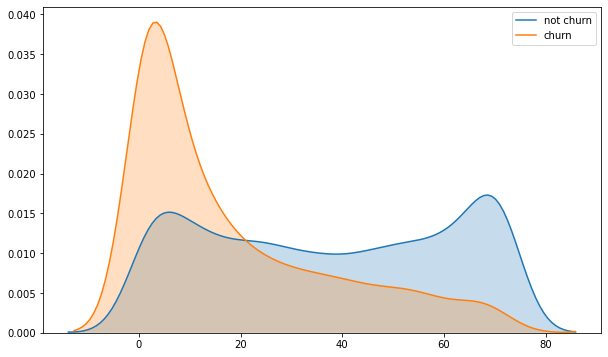

In [65]:
sns.kdeplot(df['tenure'].loc[df['Churn'] == 'No'], label='not churn', shade=True);
sns.kdeplot(df['tenure'].loc[df['Churn'] == 'Yes'], label='churn', shade=True);

In [66]:
df['tenure'].loc[df['Churn'] == 'No'].describe()

count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

In [67]:
df['tenure'].loc[df['Churn'] == 'Yes'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

Not churned customers have a much longer average tenure (20 months) than the churned customers. Makes sense.

### Monthly Charges

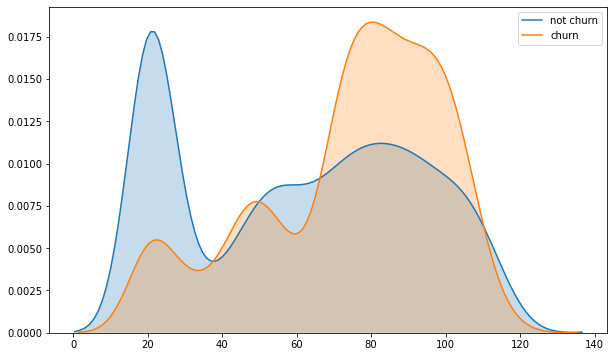

In [68]:
sns.kdeplot(df['MonthlyCharges'].loc[df['Churn'] == 'No'], label='not churn', shade=True);
sns.kdeplot(df['MonthlyCharges'].loc[df['Churn'] == 'Yes'], label='churn', shade=True);

In [69]:
df['MonthlyCharges'].loc[df['Churn'] == 'No'].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [70]:
df['MonthlyCharges'].loc[df['Churn'] == 'Yes'].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

Churned customers paid over 20% higher on average monthly fee than non-churned customers. Money talks. 

### Total Charges

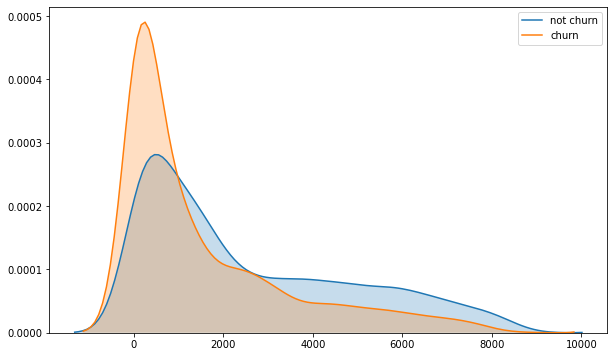

In [71]:
sns.kdeplot(df['TotalCharges'].loc[df['Churn'] == 'No'], label='not churn', shade=True);
sns.kdeplot(df['TotalCharges'].loc[df['Churn'] == 'Yes'], label='churn', shade=True);

### Encode labels with value between 0 and 1.

In [72]:
le = preprocessing.LabelEncoder()
df['Churn'] = le.fit_transform(df.Churn.values)

Fill nan with mean of the column

In [73]:
df = df.fillna(df.mean())

### Encode categorical features

In [74]:
categorical =  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for f in categorical:
    dummies = pd.get_dummies(df[f], prefix = f, prefix_sep = '_')
    df = pd.concat([df, dummies], axis = 1)
# drop original categorical features
df.drop(categorical, axis = 1, inplace = True)

### Autoencoder

In [75]:
df.head(3)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [76]:
df.shape

(7043, 47)

In [78]:
X_train, X_val = train_test_split(df, test_size=2958)

cols = [c for c in df.columns if c not in ['customerID','Churn']]
y_train = X_train['Churn']#.as_matrix()
X_train = MinMaxScaler().fit_transform(X_train[cols])
y_val= X_val['Churn']#.as_matrix()
X_val = MinMaxScaler().fit_transform(X_val[cols])

print(y_train.shape, y_val.shape)

(4085,) (2958,)


In [79]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=1479, random_state=0)
print(y_train.shape, y_val.shape, y_test.shape, df.shape)

(4085,) (1479,) (1479,) (7043, 47)


Create batch to send through our network

In [80]:
def fit_batchsize(X,y,batch_size):
    n_size = (len(X)//batch_size)*batch_size
    X = X[0:n_size]
    y = y[0:n_size]
    return X, y

batch_size = 100

X_train, y_train = fit_batchsize(X_train,y_train, batch_size)
X_val, y_val = fit_batchsize(X_val, y_val, batch_size)

X_test,y_test = fit_batchsize(X_test,y_test, batch_size)
print(X_val.shape, X_train.shape)

(1400, 45) (4000, 45)


###  Implementation

In [81]:
# Define input layer
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,))
# Define Encoder layers
n_z = 2
n_epoch = 200

h_q = Dense(512, activation='relu')(inputs)
mu = Dense(n_z, activation='linear')(h_q)
log_sigma = Dense(n_z, activation='linear')(h_q)

# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(inputs, mu)

def sample_z(args):
    mu, log_sigma = args
    eps = K.random_normal(shape=(batch_size, n_z), mean=0., stddev=1.)
    return mu + K.exp(log_sigma / 2) * eps


# Sample z ~ Q(z|X)
z = Lambda(sample_z, name='sampleZ', output_shape=(n_z,))([mu, log_sigma])

# Define decoder layers in VAE model
decoder_hidden = Dense(512, activation='relu')
decoder_out = Dense(input_dim, activation='sigmoid')

h_p = decoder_hidden(z)
outputs = decoder_out(h_p)

# Overall VAE model, for reconstruction and training
vae = Model(inputs, outputs)

# Generator model, generate new data given latent variable z
d_in = Input(shape=(n_z,))
d_h = decoder_hidden(d_in)
d_out = decoder_out(d_h)
decoder = Model(d_in, d_out)

In [82]:
# translate our loss into Keras code
def vae_loss(y_true, y_pred):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    recon = K.sum(K.binary_crossentropy(y_pred, y_true), axis=1)
    kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)
    return recon + kl

In [83]:
vae.compile(optimizer='adam', loss=vae_loss)
vae_history = vae.fit(X_train, X_train, 
                      batch_size=batch_size, 
                      shuffle=True, 
                      validation_data = (X_val, X_val),
                      epochs=n_epoch, 
                      callbacks = [EarlyStopping(monitor='loss', patience = 3)])

Train on 4000 samples, validate on 1400 samples
Epoch 1/200
4000/4000 [==============================] - 1s 184us/step - loss: 279.7525 - val_loss: 230.1904
Epoch 2/200
4000/4000 [==============================] - 0s 69us/step - loss: 213.5364 - val_loss: 196.8013
Epoch 3/200
4000/4000 [==============================] - 0s 65us/step - loss: 194.3763 - val_loss: 184.3365
Epoch 4/200
4000/4000 [==============================] - 0s 65us/step - loss: 172.8197 - val_loss: 163.5884
Epoch 5/200
4000/4000 [==============================] - 0s 63us/step - loss: 161.2126 - val_loss: 155.0431
Epoch 6/200
4000/4000 [==============================] - 0s 75us/step - loss: 155.6478 - val_loss: 152.0384
Epoch 7/200
4000/4000 [==============================] - 0s 71us/step - loss: 153.0478 - val_loss: 149.9724
Epoch 8/200
4000/4000 [==============================] - 0s 68us/step - loss: 151.1691 - val_loss: 148.2542
Epoch 9/200
4000/4000 [==============================] - 0s 82us/step - loss: 149.4265 

4000/4000 [==============================] - 0s 109us/step - loss: 122.4718 - val_loss: 123.7105
Epoch 76/200
4000/4000 [==============================] - 0s 119us/step - loss: 122.3096 - val_loss: 123.6457
Epoch 77/200
4000/4000 [==============================] - 0s 95us/step - loss: 122.2983 - val_loss: 123.9613
Epoch 78/200
4000/4000 [==============================] - 0s 101us/step - loss: 122.5586 - val_loss: 123.5697
Epoch 79/200
4000/4000 [==============================] - 1s 135us/step - loss: 122.3734 - val_loss: 123.8168
Epoch 80/200
4000/4000 [==============================] - 0s 107us/step - loss: 122.2568 - val_loss: 123.5382
Epoch 81/200
4000/4000 [==============================] - 0s 100us/step - loss: 122.0728 - val_loss: 123.3327
Epoch 82/200
4000/4000 [==============================] - 0s 112us/step - loss: 122.1270 - val_loss: 123.4761
Epoch 83/200
4000/4000 [==============================] - 0s 86us/step - loss: 122.0961 - val_loss: 123.9536
Epoch 84/200
4000/4000 [=

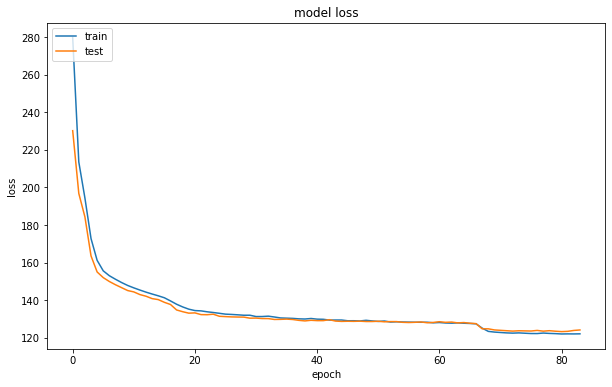

In [84]:
plt.plot(vae_history.history['loss'])
plt.plot(vae_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

We use reconstruction error to measure how well the decoder is performing. Autoencoders are trained to reduce reconstruction error which we show below:

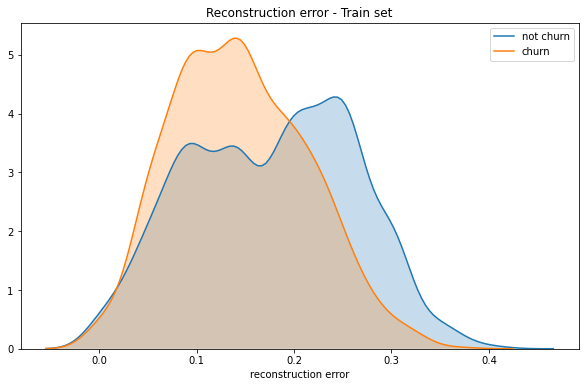

In [85]:
x_train_encoded = encoder.predict(X_train)

pred_train = decoder.predict(x_train_encoded)
mse = np.mean(np.power(X_train - pred_train, 2), axis=1)
error_df = pd.DataFrame({'recon_error': mse,
                        'churn': y_train})

plt.figure(figsize=(10,6))
sns.kdeplot(error_df.recon_error[error_df.churn==0], label='not churn', shade=True, clip=(0,10))
sns.kdeplot(error_df.recon_error[error_df.churn==1], label='churn', shade=True, clip=(0,10))
plt.xlabel('reconstruction error');
plt.title('Reconstruction error - Train set');

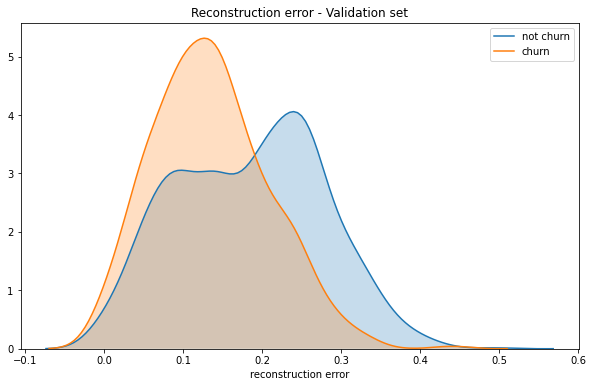

In [86]:
x_val_encoded = encoder.predict(X_val)

pred = decoder.predict(x_val_encoded)
mseV = np.mean(np.power(X_val - pred, 2), axis=1)
error_df = pd.DataFrame({'recon_error': mseV,
                        'churn': y_val})

plt.figure(figsize=(10,6))
sns.kdeplot(error_df.recon_error[error_df.churn==0], label='not churn', shade=True, clip=(0,10))
sns.kdeplot(error_df.recon_error[error_df.churn==1], label='churn', shade=True, clip=(0,10))
plt.xlabel('reconstruction error');
plt.title('Reconstruction error - Validation set');

### Latent space

We can see that Churn and Not Churn customers, can be separable at latent space.

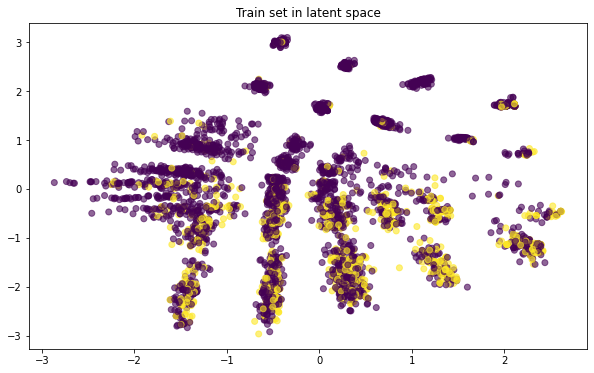

In [87]:
x_train_encoded = encoder.predict(X_train)

plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], 
            c=y_train, alpha=0.6)
plt.title('Train set in latent space')
plt.show();

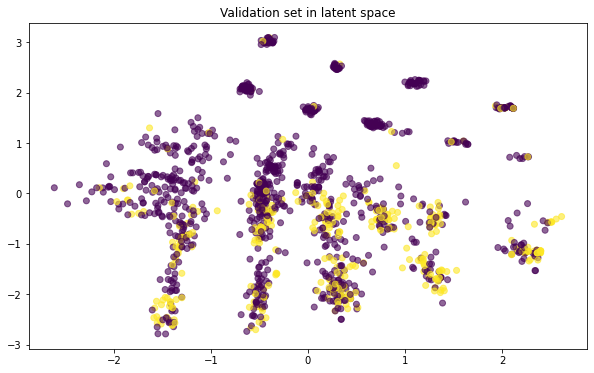

In [88]:
x_val_encoded = encoder.predict(X_val)

plt.scatter(x_val_encoded[:, 0], 
            x_val_encoded[:, 1], 
            c=y_val, alpha=0.6)

plt.title('Validation set in latent space')
plt.show();

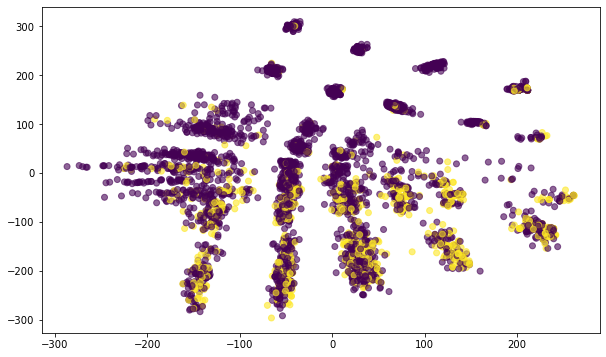

In [89]:
x_train_encoded = encoder.predict(X_train)
plt.scatter(100.*x_train_encoded[:, 0], 
            100.*x_train_encoded[:, 1], 
            c=y_train, alpha=0.6)
plt.show();

### Classification in Latent space

Any classification method can be used, lets try nearest neighbour

Playing with classification parameter to get best prediction on Validation set

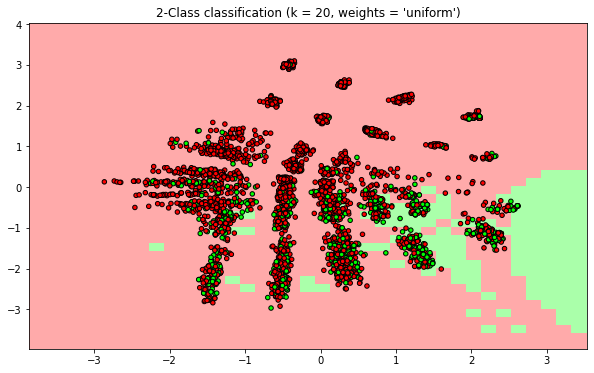

In [90]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
weights='uniform'
n_neighbors=20
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
X=x_train_encoded
y=y_train
clf.fit(X, y)

h=0.2
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i, weights = '%s')"
            % (n_neighbors, weights));

Prediction on the validation set.

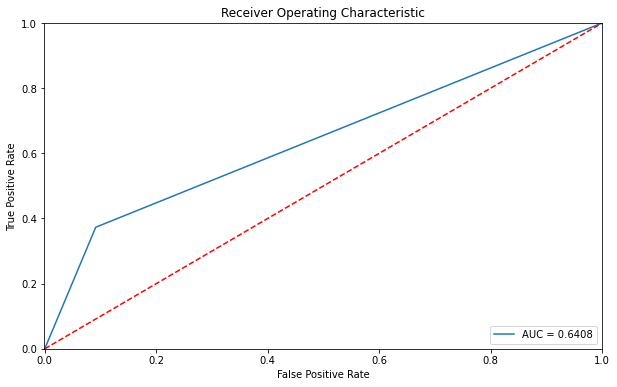

In [91]:
x_val_encoded = encoder.predict(X_val)
fpr, tpr, thresholds = roc_curve(y_val, clf.predict(x_val_encoded))
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [92]:
print('Accuracy:')
print(accuracy_score(y_val, clf.predict(x_val_encoded)))
print("Confusion Matrix:")
print(confusion_matrix(y_val,clf.predict(x_val_encoded)))
print("Classification Report:")
print(classification_report(y_val,clf.predict(x_val_encoded)))

Accuracy:
0.7578571428571429
Confusion Matrix:
[[914  92]
 [247 147]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1006
           1       0.62      0.37      0.46       394

    accuracy                           0.76      1400
   macro avg       0.70      0.64      0.65      1400
weighted avg       0.74      0.76      0.74      1400



Prediction on the test set

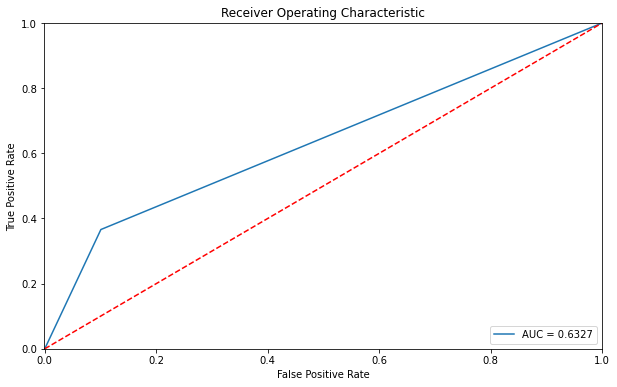

In [93]:
x_test_encoded = encoder.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict(x_test_encoded))
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [94]:
print('Accuracy:')
print(accuracy_score(y_test, clf.predict(x_test_encoded)))
print("Confusion Matrix:")
print(confusion_matrix(y_test,clf.predict(x_test_encoded)))
print("Classification Report:")
print(classification_report(y_test,clf.predict(x_test_encoded)))

Accuracy:
0.7557142857142857
Confusion Matrix:
[[920 103]
 [239 138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1023
           1       0.57      0.37      0.45       377

    accuracy                           0.76      1400
   macro avg       0.68      0.63      0.64      1400
weighted avg       0.73      0.76      0.74      1400

